Import all necessary packages

In [4]:
from keras.datasets import cifar10
import numpy as np
from keras.utils import to_categorical
from keras.losses import KLDivergence
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Activation
from keras.optimizers import Adam

Importing CIFAR-10 Dataset

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [6]:
# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

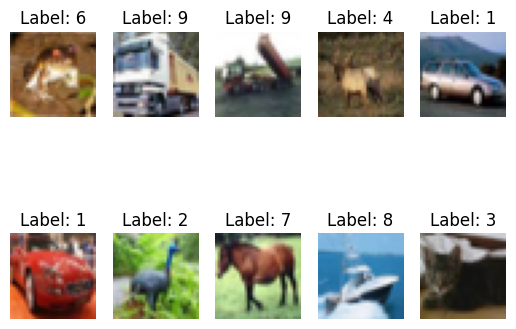

In [7]:
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis('off')
plt.show()

Function for Defining the CNN

In [8]:
def build_model(ker_size_1,ker_size_2,use_batch_norm):
    model = Sequential()

    # 1st layer
    model.add(Conv2D(32, (ker_size_1, ker_size_2), padding='same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    if use_batch_norm:
      model.add(BatchNormalization())

    # 2nd layer
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    if use_batch_norm:
      model.add(BatchNormalization())

    # 3rd layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # 4th layer
    model.add(Dropout(0.2))

    # 5th layer
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    if use_batch_norm:
      model.add(BatchNormalization())

    # 6th layer
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    if use_batch_norm:
      model.add(BatchNormalization())

    # 7th layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # 8th layer
    model.add(Dropout(0.3))

    # 9th layer
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    if use_batch_norm:
      model.add(BatchNormalization())

    # 10th layer
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    if use_batch_norm:
      model.add(BatchNormalization())

    # 11th layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # 12th layer
    model.add(Dropout(0.4))

    # Last layer
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))

    return model

Function to Compile and fit model

In [18]:
def compile_model(learning_rate,ker_size_1,ker_size_2,use_batch_norm,batch_size):
  model = build_model(ker_size_1,ker_size_2,use_batch_norm)
  model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
  history = model.fit(x_train, y_train, batch_size=batch_size, epochs=20, validation_data=(x_test, y_test))
  return model, history

Function to evaluate model

In [19]:
def model_evaluation(model,history,text):
  test_loss, test_accuracy = model.evaluate(x_test, y_test)
  train_loss, train_accuracy = model.evaluate(x_train, y_train)
  print(f'Train accuracy {text}:  {train_accuracy}')
  print(f'Test accuracy {text}: {test_accuracy}')
  print(f'Training loss {text}: {train_loss}')
  print(f'Testing loss {text}: {test_loss}')

Functions to Plot history and Model prediction results

In [20]:
def plot_history(history,text):
  plt.subplot(2,1,1)
  plt.title("Training Vs Validation Loss for "+text)
  plt.plot( history.history['loss'], label = 'loss')
  plt.plot( history.history['val_loss'], label = 'val_loss')
  plt.legend(loc = 'best')
  plt.grid()
  plt.subplot(2,1,2)
  plt.title("Training Vs Validation Accuracy for "+text)
  plt.plot( history.history['accuracy'], label = 'accuracy')
  plt.plot( history.history['val_accuracy'], label = 'val_accuracy')
  plt.legend(loc = 'best')
  plt.grid()
  plt.tight_layout()
  plt.show()

In [21]:
def plot_image_predictions(model, x_test, y_test, num_images):
    # Predict the probabilities for each class
    predicted_probabilities = model.predict(x_test[:num_images])

    # Get the predicted class labels
    predicted_labels = np.argmax(predicted_probabilities, axis=1)

    # Get the true class labels
    true_labels = np.argmax(y_test[:num_images], axis=1)

    # Plot the images and their labels
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(2, num_images // 2, i + 1)
        plt.imshow(x_test[i])
        plt.title(f"True: {true_labels[i]}\nPredicted: {predicted_labels[i]}")
        plt.axis('off')
    plt.show()

Default Model Compilation and Evaluation

In [22]:
model, history = compile_model(0.001,3,3,True,64)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.3731 - loss: 2.2241 - val_accuracy: 0.5674 - val_loss: 1.3168
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.6039 - loss: 1.1905 - val_accuracy: 0.6720 - val_loss: 0.9628
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6851 - loss: 0.9212 - val_accuracy: 0.7191 - val_loss: 0.8274
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7326 - loss: 0.7698 - val_accuracy: 0.7374 - val_loss: 0.7437
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7623 - loss: 0.6866 - val_accuracy: 0.7743 - val_loss: 0.6606
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7800 - loss: 0.6278 - val_accuracy: 0.7830 - val_loss: 0.6294
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7989 - loss: 0.5714 - val_accuracy: 0.7881 - val_loss: 0.6223
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8219 - loss: 0.5110 - val_accura

In [23]:
model_evaluation(model,history,"for Default Model Configuration")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8404 - loss: 0.5023
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9509 - loss: 0.1458
Train accuracy for Default Model Configuration:  0.9511600136756897
Test accuracy for Default Model Configuration: 0.8406000137329102
Training loss for Default Model Configuration: 0.14631877839565277
Testing loss for Default Model Configuration: 0.5057398676872253


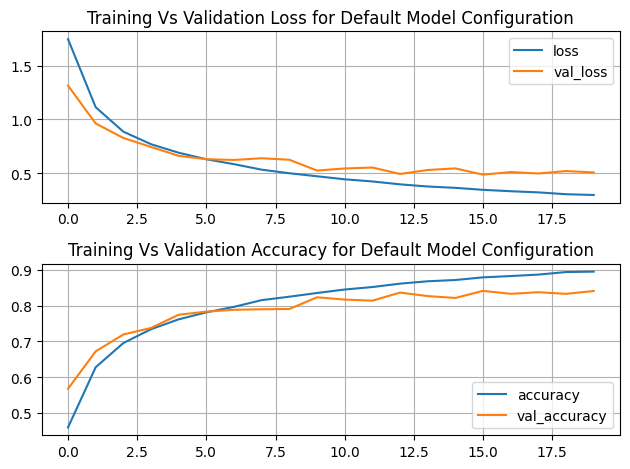

In [24]:
plot_history(history,"Default Model Configuration")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


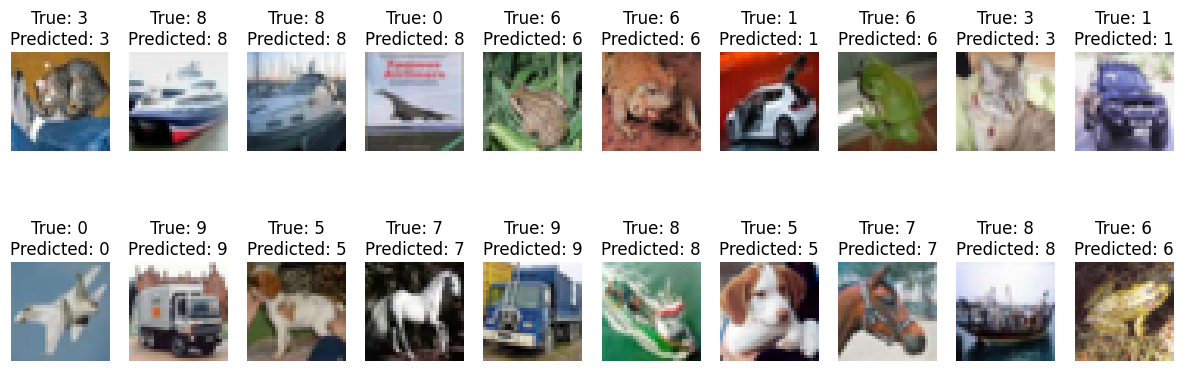

In [25]:
plot_image_predictions(model, x_test, y_test, num_images=20)

Default model configuration with Learning Rate = 0.05

In [26]:
model, history = compile_model(0.05,3,3,True,64)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.2205 - loss: 4.9365 - val_accuracy: 0.1703 - val_loss: 3.6910
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.3815 - loss: 1.7753 - val_accuracy: 0.3726 - val_loss: 2.5781
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.4587 - loss: 1.6160 - val_accuracy: 0.5546 - val_loss: 1.3032
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5372 - loss: 1.4266 - val_accuracy: 0.6109 - val_loss: 1.1931
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5769 - loss: 1.3346 - val_accuracy: 0.5595 - val_loss: 1.4501
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5989 - loss: 1.3034 - val_accuracy: 0.6068 - val_loss: 1.3282
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6235 - loss: 1.2567 - val_accuracy: 0.6703 - val_loss: 1.0762
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6452 - loss: 1.2154 - val_accuracy:

In [27]:
model_evaluation(model,history,"for Default Model Configuration, learning rate = 0.05")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7191 - loss: 1.3124
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7607 - loss: 1.0026
Train accuracy for Default Model Configuration, learning rate = 0.05:  0.7604600191116333
Test accuracy for Default Model Configuration, learning rate = 0.05: 0.7192999720573425
Training loss for Default Model Configuration, learning rate = 0.05: 1.0020105838775635
Testing loss for Default Model Configuration, learning rate = 0.05: 1.308329463005066


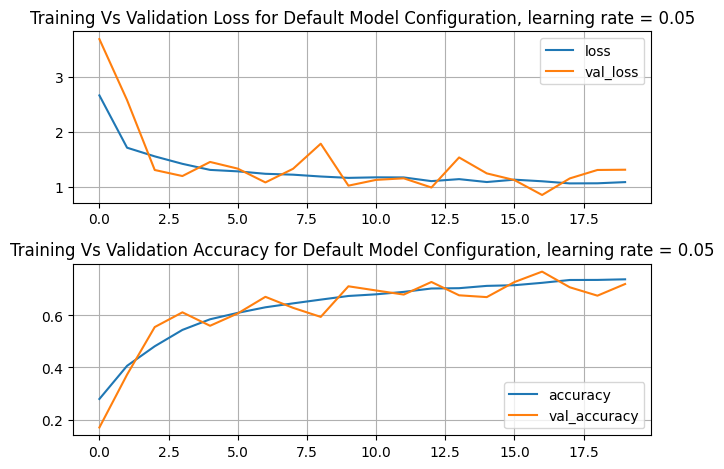

In [28]:
plot_history(history,"Default Model Configuration, learning rate = 0.05")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


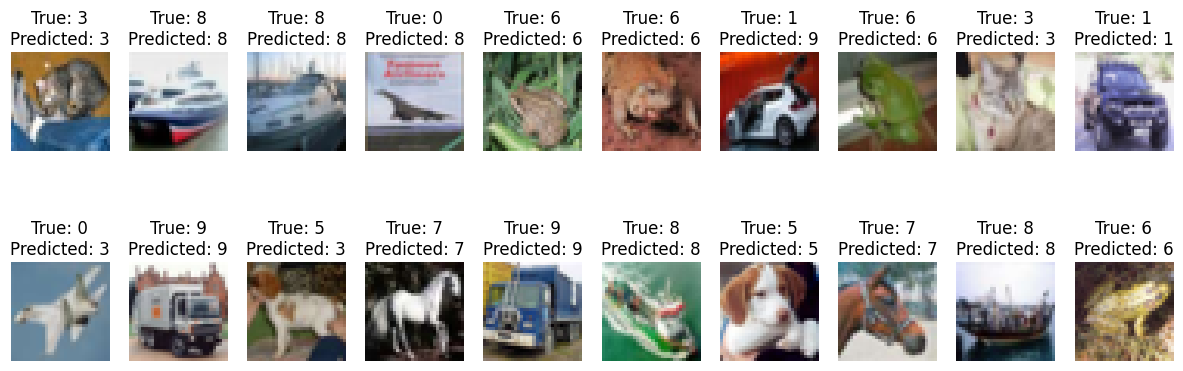

In [29]:
plot_image_predictions(model, x_test, y_test, num_images=20)

Default model configuration with Learning Rate = 0.0001

---



In [30]:
model, history = compile_model(0.0001,3,3,True,64)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.2540 - loss: 3.0273 - val_accuracy: 0.4529 - val_loss: 1.5484
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4074 - loss: 1.8734 - val_accuracy: 0.5050 - val_loss: 1.3902
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.4785 - loss: 1.5843 - val_accuracy: 0.5330 - val_loss: 1.3397
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.5267 - loss: 1.4284 - val_accuracy: 0.5408 - val_loss: 1.3337
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.5773 - loss: 1.2626 - val_accuracy: 0.6160 - val_loss: 1.1180
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6137 - loss: 1.1658 - val_accuracy: 0.6661 - val_loss: 0.9855
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6419 - loss: 1.0669 - val_accuracy: 0.6654 - val_loss: 0.9541
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6636 - loss: 0.9983 - val_accu

In [31]:
model_evaluation(model,history,"for Default Model Configuration, learning rate = 0.0001")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7786 - loss: 0.6332
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8462 - loss: 0.4396
Train accuracy for Default Model Configuration, learning rate = 0.0001:  0.8444799780845642
Test accuracy for Default Model Configuration, learning rate = 0.0001: 0.7782999873161316
Training loss for Default Model Configuration, learning rate = 0.0001: 0.4407261610031128
Testing loss for Default Model Configuration, learning rate = 0.0001: 0.6293127536773682


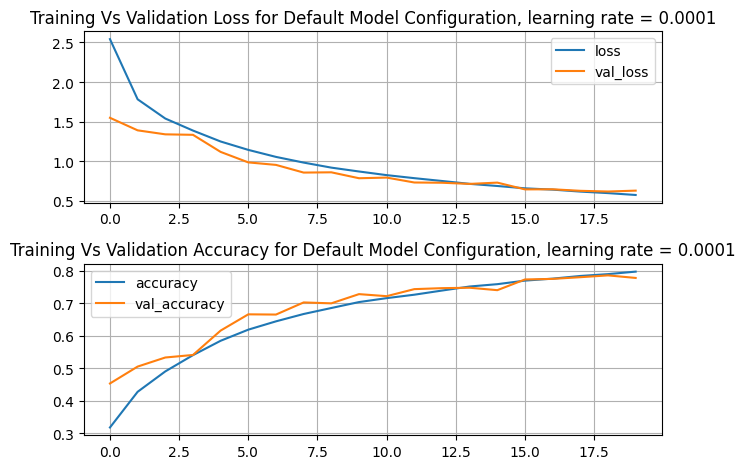

In [32]:
plot_history(history,"Default Model Configuration, learning rate = 0.0001")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step


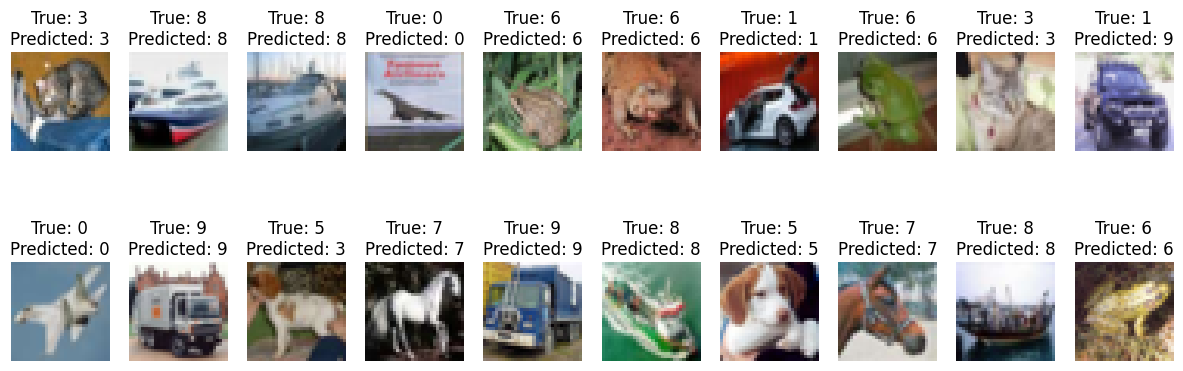

In [33]:
plot_image_predictions(model, x_test, y_test, num_images=20)

Model Configuration with First Convolutional layer as 7x7


In [34]:
model, history = compile_model(0.001,7,7,True,64)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.3402 - loss: 2.3488 - val_accuracy: 0.4877 - val_loss: 1.4412
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.5461 - loss: 1.3729 - val_accuracy: 0.6153 - val_loss: 1.1394
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6449 - loss: 1.0538 - val_accuracy: 0.6549 - val_loss: 0.9791
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6999 - loss: 0.8785 - val_accuracy: 0.7043 - val_loss: 0.8800
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7314 - loss: 0.7725 - val_accuracy: 0.7322 - val_loss: 0.8315
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7621 - loss: 0.6883 - val_accuracy: 0.7163 - val_loss: 0.8140
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7751 - loss: 0.6425 - val_accuracy: 0.7831 - val_loss: 0.6317
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7947 - loss: 0.5843 - val_accuracy

In [35]:
model_evaluation(model,history,"for Model Configuration, with First Convolutional layer as 7x7")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8314 - loss: 0.5357
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9320 - loss: 0.1958
Train accuracy for Model Configuration, with First Convolutional layer as 7x7:  0.9332000017166138
Test accuracy for Model Configuration, with First Convolutional layer as 7x7: 0.828499972820282
Training loss for Model Configuration, with First Convolutional layer as 7x7: 0.19532659649848938
Testing loss for Model Configuration, with First Convolutional layer as 7x7: 0.537027895450592


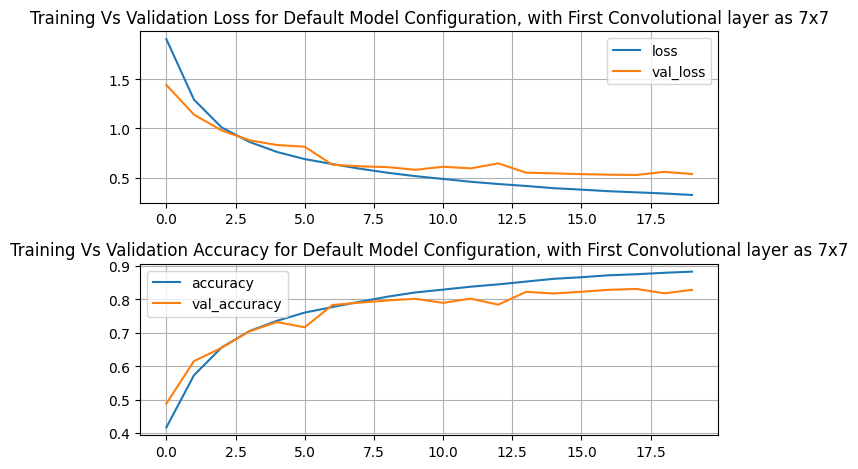

In [36]:
plot_history(history,"Default Model Configuration, with First Convolutional layer as 7x7")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


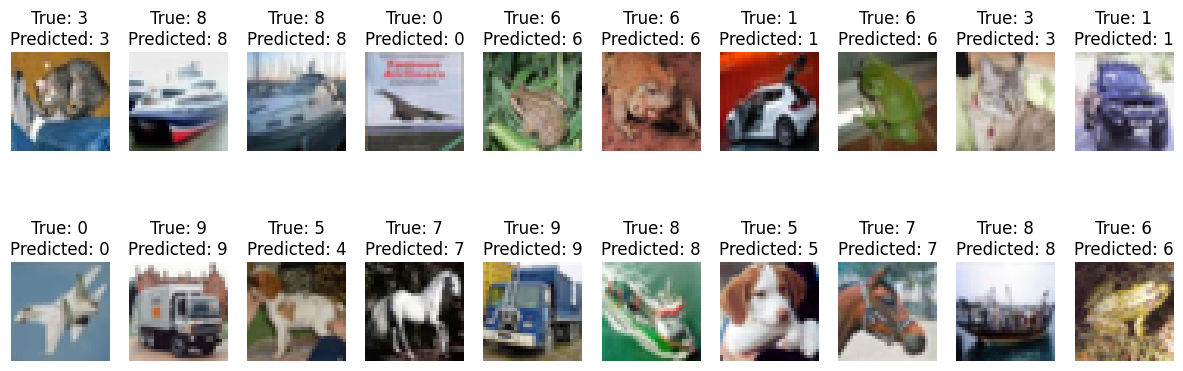

In [37]:
plot_image_predictions(model, x_test, y_test, num_images=20)

Model Configuration without batch normalization layers

In [38]:
model, history = compile_model(0.001,3,3,False,64)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.2812 - loss: 1.9262 - val_accuracy: 0.5685 - val_loss: 1.2197
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.5675 - loss: 1.2088 - val_accuracy: 0.6605 - val_loss: 0.9458
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6437 - loss: 1.0025 - val_accuracy: 0.6968 - val_loss: 0.8524
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6871 - loss: 0.8800 - val_accuracy: 0.7212 - val_loss: 0.7932
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7205 - loss: 0.7962 - val_accuracy: 0.7443 - val_loss: 0.7327
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7386 - loss: 0.7438 - val_accuracy: 0.7533 - val_loss: 0.7129
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7592 - loss: 0.6802 - val_accuracy: 0.7741 - val_loss: 0.6572
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7695 - loss: 0.6577 - val_accuracy

In [39]:
model_evaluation(model,history,"for Model Configuration, without batch normalization layers")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8095 - loss: 0.5821
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9028 - loss: 0.2766
Train accuracy for Model Configuration, without batch normalization layers:  0.9017599821090698
Test accuracy for Model Configuration, without batch normalization layers: 0.8075000047683716
Training loss for Model Configuration, without batch normalization layers: 0.28107714653015137
Testing loss for Model Configuration, without batch normalization layers: 0.5823677182197571


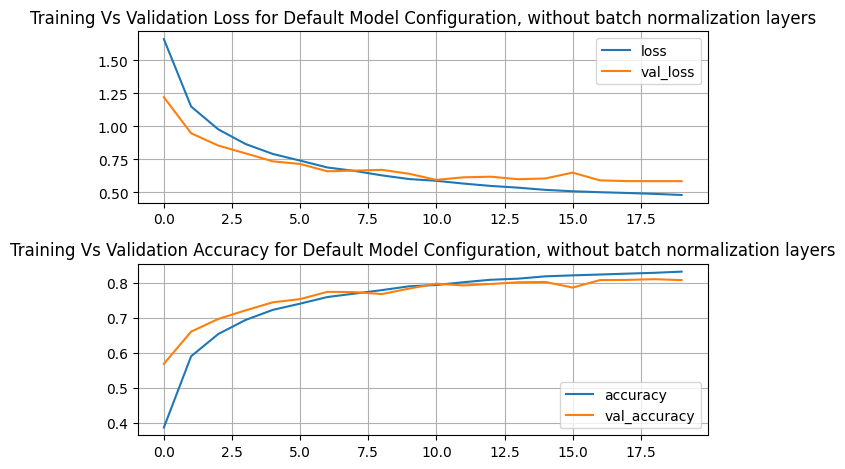

In [40]:
plot_history(history,"Default Model Configuration, without batch normalization layers")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


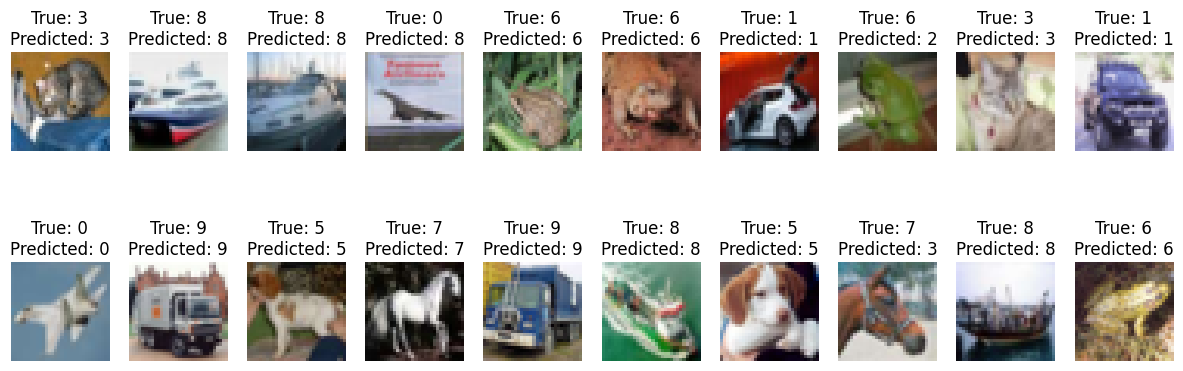

In [41]:
plot_image_predictions(model, x_test, y_test, num_images=20)

Default Model Configuration with Batch size = 16

In [42]:
model, history = compile_model(0.001,3,3,True,16)

Epoch 1/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.3952 - loss: 2.1577 - val_accuracy: 0.6290 - val_loss: 1.0740
Epoch 2/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.6432 - loss: 1.0381 - val_accuracy: 0.7050 - val_loss: 0.8547
Epoch 3/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7160 - loss: 0.8140 - val_accuracy: 0.7600 - val_loss: 0.6930
Epoch 4/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.7556 - loss: 0.7018 - val_accuracy: 0.7525 - val_loss: 0.7124
Epoch 5/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7798 - loss: 0.6280 - val_accuracy: 0.7474 - val_loss: 0.7296
Epoch 6/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.8024 - loss: 0.5664 - val_accuracy: 0.8026 - val_loss: 0.5755
Epoch 7/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.8129 - loss: 0.5299 - val_accuracy: 0.8056 - val_loss: 0.5826
Epoch 8/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.8289 - loss: 0

In [43]:
model_evaluation(model,history,"for Model Configuration, with Batch size = 16")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8459 - loss: 0.4896
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9589 - loss: 0.1291
Train accuracy for Model Configuration, with Batch size = 16:  0.9582800269126892
Test accuracy for Model Configuration, with Batch size = 16: 0.8461999893188477
Training loss for Model Configuration, with Batch size = 16: 0.13037703931331635
Testing loss for Model Configuration, with Batch size = 16: 0.48444491624832153


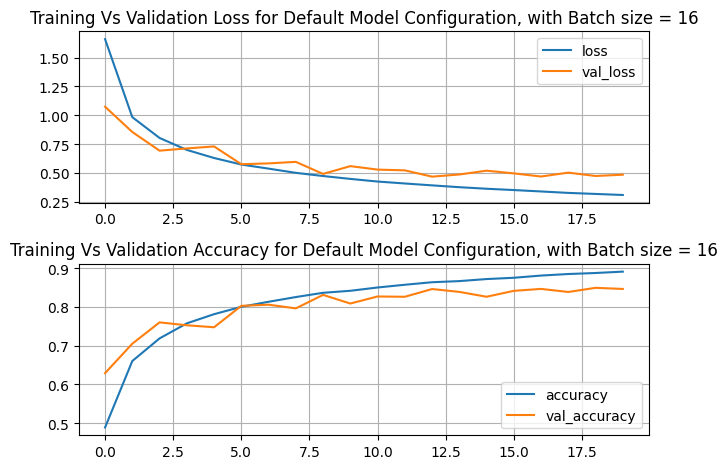

In [44]:
plot_history(history,"Default Model Configuration, with Batch size = 16")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


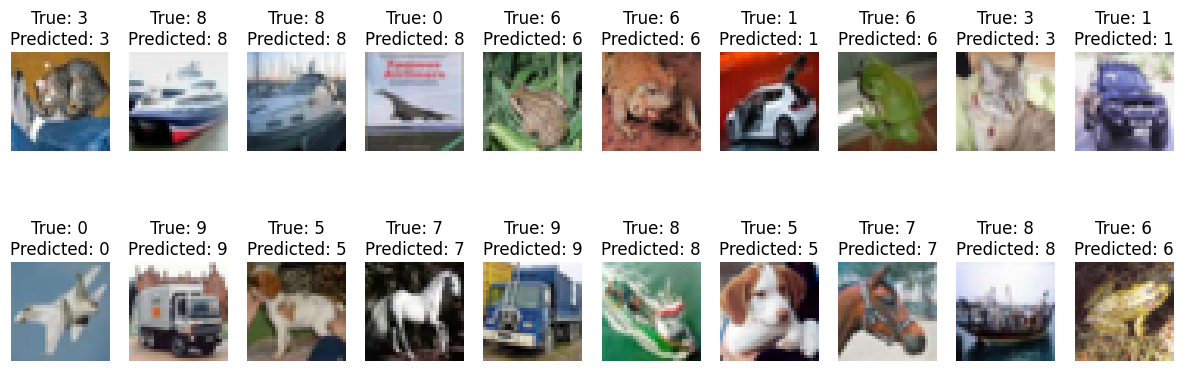

In [45]:
plot_image_predictions(model, x_test, y_test, num_images=20)

Default Model Connfiguration with Batch size = 256

In [46]:
model, history = compile_model(0.001,3,3,True,256)

Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 24s 68ms/step - accuracy: 0.3579 - loss: 2.3357 - val_accuracy: 0.1028 - val_loss: 3.4583
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.5620 - loss: 1.3366 - val_accuracy: 0.2199 - val_loss: 2.6908
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.6448 - loss: 1.0942 - val_accuracy: 0.6373 - val_loss: 1.0733
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.6948 - loss: 0.9251 - val_accuracy: 0.6914 - val_loss: 0.8996
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.7280 - loss: 0.7952 - val_accuracy: 0.7449 - val_loss: 0.7530
Epoch 6/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.7537 - loss: 0.7139 - val_accuracy: 0.7720 - val_loss: 0.6709
Epoch 7/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.7742 - loss: 0.6479 - val_accuracy: 0.7737 - val_loss: 0.6569
Epoch 8/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.7909 - loss: 0.5983 - val_ac

In [47]:
model_evaluation(model,history,"for Model Configuration, with Batch size = 256")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8203 - loss: 0.5538
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9157 - loss: 0.2333
Train accuracy for Model Configuration, with Batch size = 256:  0.9152799844741821
Test accuracy for Model Configuration, with Batch size = 256: 0.821399986743927
Training loss for Model Configuration, with Batch size = 256: 0.2339356243610382
Testing loss for Model Configuration, with Batch size = 256: 0.553329348564148


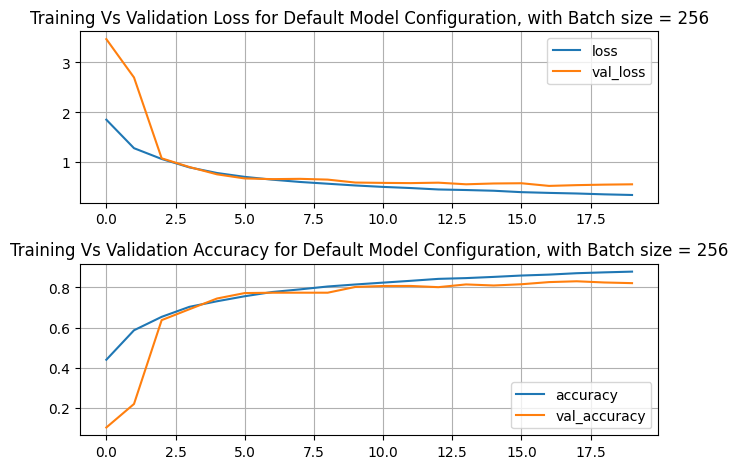

In [48]:
plot_history(history,"Default Model Configuration, with Batch size = 256")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


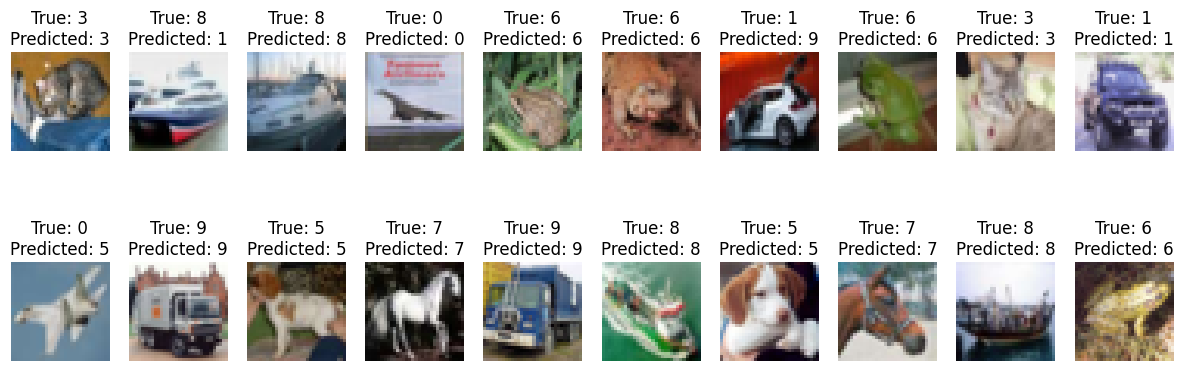

In [49]:
plot_image_predictions(model, x_test, y_test, num_images=20)